In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../core')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry_update as geometry
from core import *

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

from functools import reduce
from math import sqrt

In [43]:
test_phantom = phantom_update.Phantom(source_path = None,
            voxel_dims = (0.05e-3,0.05e-3,0.05e-3),
            matrix_dims = (200,200,200),
            baseline = (1500, 1000),
            seed = 5678,)

blood = tissue.Tissue(name='blood', c=1578, rho=1060, sigma=11.3, scale=0.00001, label=1)
test_phantom.add_tissue_sphere((0,0,0), 8, blood)
test_phantom.add_tissue_sphere((0.5,0,0), 20, blood)

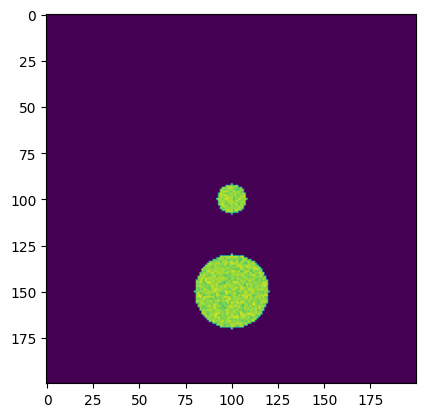

In [44]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [45]:
test_phantom.voxel_dims * test_phantom.matrix_dims * 1000

array([10., 10., 10.])

In [46]:
simprops = simulation_update.SimProperties(
                grid_size   = (4e-3,2e-3,2e-3),
                voxel_size  = (0.02e-3,0.02e-3,0.02e-3),
                PML_size    = (1,1,1),
                PML_alpha   = 2,
                t_end       = 12e-5,           # [s]
                bona        = 6,               # parameter b/a determining degree of nonlinear acoustic effects
                alpha_coeff = 0.5, 	           # [dB/(MHz^y cm)]
                alpha_power = 1.5,
                )

In [47]:
simprops.matrix_size

array([256, 128, 128])

In [66]:
bounds = simprops.bounds
# transform = geometry.Transform((np.pi/10,0,0),(0,0,0))
transform = geometry.Transform((np.pi/10,np.pi/10,np.pi/10),(0,0,0))
# transform = geometry.Transform((0,0,0),(0,0,0))
voxel_size = simprops.voxel_size
matrix_size = simprops.matrix_size

In [67]:
out = test_phantom.crop_rotate_crop(bounds, transform, voxel_size, matrix_size)

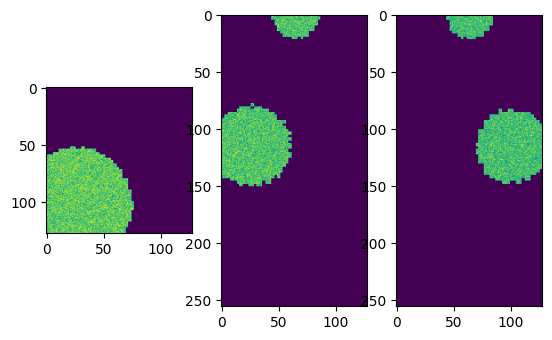

In [68]:
fig, ax = plt.subplots(1,3,)

ax[0].imshow(out[0,out.shape[1]//2,:,:])
ax[1].imshow(out[0,:,out.shape[2]//2,:])
ax[2].imshow(out[0,:,:,out.shape[3]//2])